# Alignment I: density matrix and state multipoles #

Some basic definitions and physical properties.

**Author: Paul Hockett, National Research Council of Canada, paul.hockett@nrc.ca, http://femtolab.ca**

To accompany the book Quantum Metrology with Photoelectrons, for more see:
* [Book webpages on femtolab.ca](http://femtolab.ca/?tag=metrology-book "Book webpages")
* [OSF project page (accompanying materials)](https://osf.io/q2v3g/ "OSF project page")
* [On Github (accompanying codes)](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons "Book code')

v1, 27th Feb 2019

Latest version of this notebook on Github: 

***
This set of notebooks presents some material for atomic and molecular angular momentum & alignment. 
1. The basic formal machinery: density matrices and state multipoles. (This notebook.)
2. Application to rotational state-resolved scenarios. (In preparation.)
3. Application to multi-state cases and wavepackets. (In preparation.)

For more details and background, see a [Very Brief Introduction to Angular Momentum (lecture notes)](https://doi.org/10.6084/m9.figshare.4003371.v2), and the textbooks from Blum [1] and Zare [2]. The treatment herein is drawn primarily from Blum.

***
**References**

[1] Blum, K. (2012). Density Matrix Theory and Applications (3rd Editio, Vol. 64). Berlin, Heidelberg: Springer Berlin Heidelberg. https://doi.org/10.1007/978-3-642-20561-3

[2] Zare, R. N. (1988). Angular Momentum: Understanding spatial aspects in chemistry and physics. John Wiley & Sons.

[3] Hockett, P. (2018). Quantum Metrology with Photoelectrons, Volume 1 Foundations. IOP Publishing. https://doi.org/10.1088/978-1-6817-4684-5 (See also links at top of document.)

[4] Reid, K. L., Leahy, D. J., & Zare, R. N. (1991). Effect of breaking cylindrical symmetry on photoelectron angular distributions resulting from resonance-enhanced two-photon ionization. The Journal of Chemical Physics, 95(3), 1746. https://doi.org/10.1063/1.461023

***

# Density Matrices #





The general density operator, for a mixture of indepent states $|\psi_n\rangle$, can be defined as (Eqn. 2.8, Blum [1]):

\begin{equation}
\hat{\rho}=\sum_{n}W_{n}|\psi_{n}\rangle\langle\psi_{n}|
\end{equation}

Where $W_n$ defines the (statistical) weighting of each state $\psi_n$ in the mixture.

For a given basis set, $|\phi_m\rangle$, the states can be expanded and the matrix elements of $\boldsymbol{\rho}$ defined (Eqns. 2.9 - 2.11, Blum [1]):
\begin{equation}
|\psi_{n}\rangle=\sum_{m'}a_{m'}^{(n)}|\phi_{m'}\rangle
\end{equation}

\begin{equation}
\hat{\rho}=\sum_{n}\sum_{mm'}W_{n}a_{m'}^{(n)}a_{m}^{(n)*}|\phi_{m'}\rangle\langle\phi_{m}|
\end{equation}

And the matrix elements - _the density matrix_ - given explicitly as:

\begin{equation}
\boldsymbol{\rho}_{i,j}=\langle\phi_{i}|\hat{\rho}|\phi_{j}\rangle=\sum_{n}W_{n}a_{i}^{(n)}a_{j}^{(n)*}
\end{equation}

For all pairs of basis states $(i,j)$. This defines the density matrix in the $\{|\phi_n\rangle\}$ _representation_ (basis space).

The expectation value of an operator $\hat{Q}$ can then be found as (Eqn. 2.18, Blum [1]):

\begin{eqnarray}
\langle \hat{Q}\rangle & = & \sum_{n}\sum_{mm'}W_{n}a_{m'}^{(n)}a_{m}^{(n)*}\langle\phi_{m}|\hat{Q}|\phi_{m'}\rangle\\
 & = & \sum_{mm'}\langle\phi_{m'}|\hat{\rho}|\phi_{m}\rangle\langle\phi_{m}|\hat{Q}|\phi_{m'}\rangle\\
 & = & \mathrm{tr}(\rho Q)
\end{eqnarray}

## Example: M-level distributions for single J states ##
Expand the density matrix in the $\{|JM\rangle\}$ representation:

\begin{equation}
\boldsymbol{\rho}(J',J)_{M',M}=\langle J'M'|\hat{\rho}|JM\rangle
\end{equation}

For a single state, $J=J'$, and the density matrix will be diagonal.

- For an _isotropic_ ensemble, there is no preferred direction in space, which corresponds to an equal population of all $M$-levels.
- For an _aligned_ ensemble, there is a symmetric distribution of $\pm M$-levels about $M=0$.
- For an _oriented_ ensemble, there is a non-symmetric distribution of $M$-levels.

Some examples are given below (for arbitrary cases).

In [158]:
# Imports. Use Sympy for symbolic maths.
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

init_printing()  # Set fancy printing for Sympy

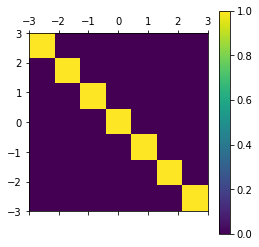

In [159]:
# Density matrix for a single J, isotropic case
def pJmmIso(J):
    pmm = np.eye(2*J+1)
    
    return pmm

J = 3
pIso = pJmmIso(J)

plt.matshow(pIso, extent = (-J,J,-J,J), aspect = 'equal')
plt.colorbar()
plt.show()

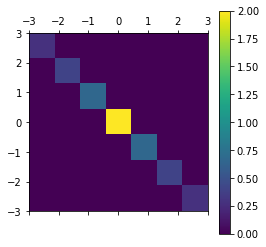

In [160]:
# Density matrix for a single J, example of an aligned ensemble
def pJmmA(J):
    pmm = np.zeros((2*J+1,2*J+1))
    
    for M in range(-J,J+1,1):
        pmm[M+J][M+J] = 1/(np.absolute(M)+0.5)
        
    return pmm

J = 3
pA = pJmmA(J)

plt.matshow(pA, extent = (-J,J,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()

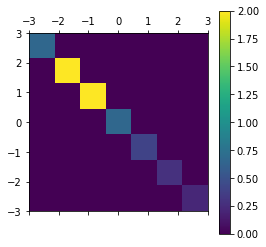

In [161]:
# Density matrix for a single J, example of an oriented ensemble
def pJmmA(J):
    pmm = np.zeros((2*J+1,2*J+1))
    
    for M in range(-J,J+1,1):
        pmm[M+J][M+J] = 1/(np.absolute(M+1.5))
        
    return pmm

J = 3
pA = pJmmA(J)

plt.matshow(pA, extent = (-J,J,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()

## Example: state selected, 1-photon, transition ##
For a basic state-selected transition, following absorption of a photon, 

\begin{equation}
|J_{i}\rangle\overset{1,q}{\rightarrow}|J_{f}\rangle
\end{equation}

The corresponding density matrix is proportional to the angular momentum coupling coefficient (see Sect. 7 in Blum [1]; also Sect. 3.1.1 and Eqn. 3.5 in Hockett [3], and Reid et. al. [4]):

\begin{equation}
\boldsymbol{\rho}(J_f)_{M',M}\propto\sum_{M_{g}}\left(\begin{array}{ccc}
J_{i} & 1 & J_{f}\\
-M_{i} & q & M_{f}
\end{array}\right)^{2}
\end{equation}

Where it has been assumed that the initial state $J_g$ is isotropic.

The properties of the final state $M$-level distribution will then depend on the transition ($\Delta J$) and the polarization of the light ($q$).

In [162]:
# Define 1-photon density matrix (final m-states), no frame rotation (diagonal)
from sympy.physics.wigner import wigner_3j

def pmmCalcDiag(Ji,Jf,p):
    
    pmm = np.zeros((2*Jf+1,2*Jf+1))
    
    for Mf in range(-Jf,Jf+1,1):
        for Mi in range(-Ji,Ji+1,1):
            pmm[Mf+Jf][Mf+Jf] += wigner_3j(Ji,p[0],Jf,-Mi,p[1],Mf)**2
                
    return pmm     

Linear polarization Jf=Ji+1 - aligned final state ensemble


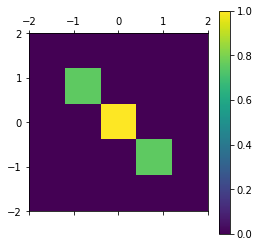

Linear polarization Jf=Ji - (anti) aligned final state ensemble


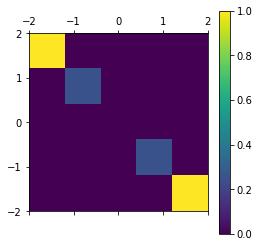

Circ polarization, q=+1 - oriented final state ensemble


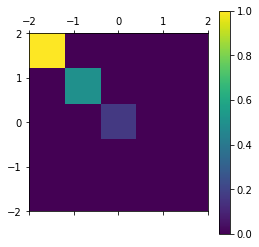

Circ polarization, q=-1 - oriented final state ensemble


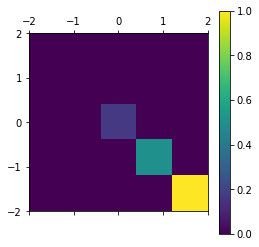

In [163]:
# Define states
Ji = 1  # Initial |J>
Jf = 2  # Final |J>
p = (1,0)   # Coupling (photon) |1,q>

print('Linear polarization Jf=Ji+1 - aligned final state ensemble')
pmm = pmmCalcDiag(Ji,Jf,p)

plt.matshow(pmm/np.amax(pmm), extent = (-Jf,Jf,-Jf,Jf), aspect = 'equal') 
plt.colorbar()
plt.show()

# For dJ=0
print('Linear polarization Jf=Ji - (anti) aligned final state ensemble')
pmm = pmmCalcDiag(Jf,Jf,p)

plt.matshow(pmm/np.amax(pmm), extent = (-Jf,Jf,-Jf,Jf), aspect = 'equal') 
plt.colorbar()
plt.show()


# Case for circular polarization
p = (1,1)   # Coupling (photon) |1,q>

print('Circ polarization, q=+1 - oriented final state ensemble')
pmm = pmmCalcDiag(Ji,Jf,p)

plt.matshow(pmm/np.amax(pmm), extent = (-Jf,Jf,-Jf,Jf), aspect = 'equal') 
plt.colorbar()
plt.show()

p = (1,-1)   # Coupling (photon) |1,q>

print('Circ polarization, q=-1 - oriented final state ensemble')
pmm = pmmCalcDiag(Ji,Jf,p)

plt.matshow(pmm/np.amax(pmm), extent = (-Jf,Jf,-Jf,Jf), aspect = 'equal') 
plt.colorbar()
plt.show()

# State Multipoles #
A more physical picture of the geometric properties of an ensemble can be obtain from the _state multipoles_, which are defined by (spherical) tensor operators. These provide a means to expand the irreducible components of the density matrix, and the geometric properties of the ensemble. (See Chapter 4 in Blum [1] for further details.)

In the $\{|JM\rangle\}$ representation (Eqn. 4.8 in Blum [1]):

\begin{equation}
\hat{T}(J',J)_{KQ}=\sum_{M'M}(-1)^{J'-M'}(2K+1)^{1/2}\left(\begin{array}{ccc}
J' & J & K\\
M' & -M & Q
\end{array}\right)|J'M'\rangle\langle JM|
\end{equation}

Where $\hat{T}(J',J)_{KQ}$ are tensor operators. The corresponding matrix elements are (Eqn. 4.9 in Blum [1]):

\begin{equation}
\langle J'M'|\hat{T}(J',J)_{KQ}|JM\rangle=(-1)^{J'-M'}(2K+1)^{1/2}\left(\begin{array}{ccc}
J' & J & K\\
M' & -M & Q
\end{array}\right)
\end{equation}

The density matrix can be written in terms of the tensor operators
(Eqn. 4.30 in Blum):

\begin{equation}
\boldsymbol{\rho}=\sum_{KQ}\sum_{J'J}\left[\sum_{M'M}\langle J'M'|\hat{\rho}|JM\rangle(-1)^{J'-M'}(2K+1)^{1/2}\left(\begin{array}{ccc}
J' & J & K\\
M' & -M & Q
\end{array}\right)\right]\hat{T}(J',J)_{KQ}
\end{equation}

And the state multipoles are defined as the term in square brackets
(Eqn. 4.31 in Blum):

\begin{equation}
\left\langle T(J',J)_{KQ}^{\dagger}\right\rangle =\sum_{M'M}\langle J'M'|\hat{\rho}|JM\rangle(-1)^{J'-M'}(2K+1)^{1/2}\left(\begin{array}{ccc}
J' & J & K\\
M' & -M & -Q
\end{array}\right)
\end{equation}

And the inverse (Eqn. 4.34 in Blum):

\begin{equation}
\langle J'N'|\hat{\rho}|JN\rangle=\sum_{N'N}(-1)^{J'-N'}(2K+1)^{1/2}\left(\begin{array}{ccc}
J' & J & K\\
M' & -N & -Q
\end{array}\right)\left\langle T(J',J)_{KQ}^{\dagger}\right\rangle 
\end{equation}

The spatial representation of the ensemble can be defined in terms
of the state multipoles - hence the name - by expanding in a suitable
basis, usually the spherical harmonics. For example, for a single
angular momentum state $J$, this is given by (Eqn. 4.101 in Blum):

\begin{equation}
W(\theta,\phi)=\left(\frac{1}{4\pi}\right)^{1/2}\sum_{KQ}(-1)^{J}(2J+1)^{1/2}\left(\begin{array}{ccc}
J & J & K\\
0 & 0 & 0
\end{array}\right)\left\langle T(J)_{KQ}^{\dagger}\right\rangle Y_{KQ}(\theta,\phi)
\end{equation}

Where $W(\theta,\phi)$ is the spatial distribution function, and
$Y_{KQ}(\theta,\phi)$ are spherical harmonics.

In [164]:
from sympy.physics.wigner import wigner_3j

# Define T(J,J')KQ matrix elements. 
# Eqn 4.9 in Blum (p118), note slight differences to eqn. 55, Zare, p236 - likely equivalent for J=Jp
# TODO: implement switch/dictionary for versions
def TjjpkqMatEle(Jp,J,K,Q,ver=0):
    
    Jmax = max(J,Jp)
    TKQmm = np.zeros((2*Jmax+1,2*Jmax+1))
    
    for M in range(-J,J+1,1):
        for Mp in range (-Jp,Jp+1,1):
            
            # TKQmm[M+J][Mp+J] = (-1)**(J-M)*clebsch_gordan(J,J,K,Mp,-M,Q) # T(J)KQ, Zare eqn. 55
            # TKQmm[M+J][Mp+J] = (-1)**(J-Mp)*clebsch_gordan(J,J,K,Mp,-M,Q) # T(J)KQ dagger, Zare eqn. 62
            TKQmm[Mp+Jp][M+J] = (-1)**(Jp-Mp)*sqrt(2*K+1)*wigner_3j(Jp,J,K,Mp,-M,-Q)
            
            
    return TKQmm  

# TKQs state multipoles
# Eqn. 4.31 in Blum (p124) - cf. eqn. 62 in Zare, p237.
# NOTE - this is <T^dagger>
# Assume isotropic distribution, or state following a 1-photon transition if p is passed
def TKQpmm(Jp, J, Ji = 0, p = None):
    
    # Determine density matrix - following 1-photon excitation to max(J,Jp)
    if p is not None:
        pmm = pmmCalcDiag(Ji,max(J,Jp),p) 
        # pass
    else:
    # Density matrix for isotropic ensemble
        pmm = np.eye(2*Jp+1,2*J+1)
    
    # Calculate T(Jf,K,Q) for pmm
    TKQ = []  # Native list to hold results
    thres = 1E-5
    Kmax = 2*max(J,Jp)+1
    
    for K in range(0,Kmax+1):
        for Q in range(0,K+1):
            KQmat = TjjpkqMatEle(Jp,J,K,Q) * pmm  # Array-wise multiplication of matrix elements
            TKQval = KQmat.sum()
            
            if np.abs(TKQval) > thres:
                TKQ.append([K,Q,KQmat.sum()])  # Store value if > threshold
            
    return np.array(TKQ)  # Convert to np array for later use

In [165]:
# Test for simple (isotropic) case - simply a (T=0,K=0) population term.
TKQ = TKQpmm(2,2)
TKQ

array([[0.        , 0.        , 2.23606798]])

## Example: state selected, 1-photon, transition ##
$T(J',J)_{K,Q}$ examples to match the density matrix examples given above.

**NOTE**: possible phase convention issue here, TBD.

In [166]:
# Test for simple 1-photon cases to match density matrix examples above
# Note two terms for linear polarization cases, a (T=0,K=0) population term and (T=2, K=0) alignment term.
# Circ. pol also has (T=1,K=0) orientation term.

# Define states
Ji = 1  # Initial |J>
Jf = 2  # Final |J>
p = (1,0)   # Coupling (photon) |1,q>

print('Linear polarization Jf=Ji+1 - aligned final state ensemble')
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
print(TKQ)


# For dJ=0
print('Linear polarization Jf=Ji - (anti) aligned final state ensemble')
TKQ = TKQpmm(Jf,Jf, Ji = Jf, p = p)
print(TKQ)


# Case for circular polarization
p = (1,1)   # Coupling (photon) |1,q>

print('Circ polarization, q=+1 - oriented final state ensemble')
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
print(TKQ)

p = (1,-1)   # Coupling (photon) |1,q>

print('Circ polarization, q=-1 - oriented final state ensemble')
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
print(TKQ)

Linear polarization Jf=Ji+1 - aligned final state ensemble
[[ 0.          0.          0.1490712 ]
 [ 2.          0.         -0.12472191]]
Linear polarization Jf=Ji - (anti) aligned final state ensemble
[[0.         0.         0.1490712 ]
 [2.         0.         0.12472191]]
Circ polarization, q=+1 - oriented final state ensemble
[[ 0.          0.          0.1490712 ]
 [ 1.          0.         -0.15811388]
 [ 2.          0.          0.06236096]]
Circ polarization, q=-1 - oriented final state ensemble
[[0.         0.         0.1490712 ]
 [1.         0.         0.15811388]
 [2.         0.         0.06236096]]


## Example: density matrix from state multipoles ##
As detailed above, Eqn. 4.34 in Blum gives the density matrix elements
in terms of the state multipoles. This provides a route to determining
the $M$-state distribution for a given alignment/orientation defined
by a given $\left\langle T(J',J)_{KQ}^{\dagger}\right\rangle $.

In [167]:
# Define p(Jp,Np,J,N) from TKQ - general version, eqn. 4.34 in Blum (p125)
# Basically the same as TjjpkqMatEle defined above, but uses TKQ tensor values (list)
def pJpNpJN(Jp,J,TKQ):
    Jmax = max(J,Jp)
    Pmm = np.zeros((2*Jmax+1,2*Jmax+1))
    
    for Mp in range(-Jp,Jp+1):
        for M in range(-J,J+1):
            for row in range(TKQ.shape[0]):
                Pmm[Mp+Jp][M+J] += (-1)**(Jp-Mp)*sqrt(2*TKQ[row][0]+1)*wigner_3j(Jp,J,TKQ[row][0],Mp,-M,-TKQ[row][1])*TKQ[row][2]
                
    return Pmm
 

Aligned ensemble
[[0.  0.  1. ]
 [2.  0.  0.5]]


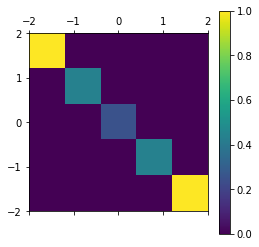

Aligned ensemble, with higher-order terms
[[0.  0.  1. ]
 [2.  0.  0.5]
 [4.  0.  0.3]]


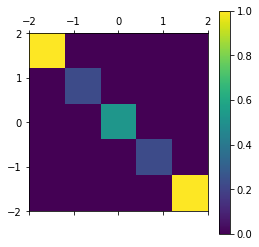

Oriented ensemble
[[0.  0.  1. ]
 [1.  0.  0.5]]


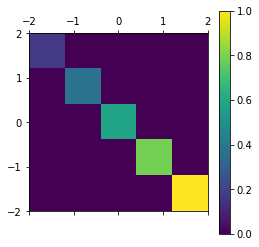

Oriented ensemble, with higher-order terms
[[0.  0.  1. ]
 [1.  0.  0.5]
 [2.  0.  0.3]
 [3.  0.  0.8]]


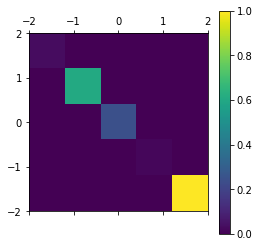

In [168]:
# Find density mat. for specified alignment TKQ

TKQ = np.array([[0,0,1],[2,0,0.5]])  # Set alignment terms, list [K,Q,TKQ]

Jp = 2  # Set angular momenta - assume a singe J-state, hence Jp=J
J = Jp

pmm = pJpNpJN(Jp,J,TKQ)  # Determine pmm

print('Aligned ensemble')
print(TKQ)
plt.matshow(pmm/np.amax(pmm), extent = (-Jp,Jp,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()


print('Aligned ensemble, with higher-order terms')
TKQ = np.array([[0,0,1],[2,0,0.5],[4,0,0.3]])  # Set alignment terms, list [K,Q,TKQ]

pmm = pJpNpJN(Jp,J,TKQ)  # Determine pmm

print(TKQ)
plt.matshow(pmm/np.amax(pmm), extent = (-Jp,Jp,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()


print('Oriented ensemble')
TKQ = np.array([[0,0,1],[1,0,0.5]])  # Set alignment terms, list [K,Q,TKQ]

pmm = pJpNpJN(Jp,J,TKQ)  # Determine pmm

print(TKQ)
plt.matshow(pmm/np.amax(pmm), extent = (-Jp,Jp,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()


print('Oriented ensemble, with higher-order terms')
TKQ = np.array([[0,0,1],[1,0,0.5],[2,0,0.3],[3,0,0.8]])  # Set alignment terms, list [K,Q,TKQ]

pmm = pJpNpJN(Jp,J,TKQ)  # Determine pmm

print(TKQ)
plt.matshow(pmm/np.amax(pmm), extent = (-Jp,Jp,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()

## Example: spatial representation $W(\theta,\phi)$ of an ensemble ##
As detailed above, Eqn. 4.101 in Blum provides an example of the spatial distribution, $W(\theta,\phi)$, of state vectors (real space expectation values) for a given ensemble.

In [169]:
# Spatial distribution of J-vectors from T(J)KQ
# Use eqn. 101 in Blum (p148)

# Define Ylm(t,p) symbolically from Sympy
from sympy import Ynm
theta, phi = symbols("theta phi")
init_printing()

# Function to sum Ylm from a list, with optional normalisation.
# Include additional 3j term to implement eqn. 101, for real-space W(theta,phi) representation.
def sphSumTKQ(A, J, norm = 1.0):
    Atp = 0
    thres = 1E-5
    
    # Loop over rows in input & add YKQ terms (should be able to convert to list comprehension for brevity)
    for row in range(A.shape[0]):  
        if np.absolute(A[row][2]) > thres:
            angMomTerm = (-1)**J * (2*J+1) * wigner_3j(J,J,A[row][0],0,0,0)
            Atp += angMomTerm*Ynm(np.int(A[row][0]),np.int(A[row][1]),theta,phi) * A[row][2]/norm # Add TKQ*Y(K,Q) term
            
    return Atp*sqrt(1/(4*pi))

Aligned ensemble


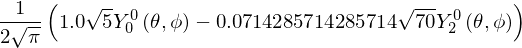

In [170]:
TKQ = np.array([[0,0,1],[2,0,0.5]])  # Set alignment terms, list [K,Q,TKQ]

print('Aligned ensemble')
Atp = sphSumTKQ(TKQ, 2, norm = TKQ[0][2])  # Sum terms in A, normalise to K=0, Q=0 term
Atp

In [171]:
# Define numerical sum over a list of harmonics defined symbolically.
def sphNList(Y, tList, pList=[0]):
    Ytp = []
    for t in tList:
        for p in pList:
            Ytp.append(Y.evalf(subs={theta:t,phi:p}))

    return np.array(Ytp)

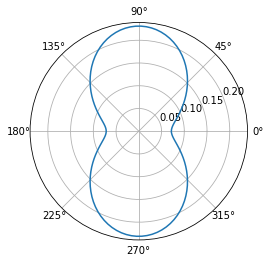

In [172]:
# Evaluate numerically for (theta,phi=0)
tList = np.arange(0,pi,0.05)
Ytp = sphNList(Atp,tList)
plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)))  # Manual fix to symmetry for theta = 0:2pi
plt.show()

Linear polarization Jf=Ji+1 - aligned final state ensemble
[[ 0.          0.          0.1490712 ]
 [ 2.          0.         -0.12472191]]


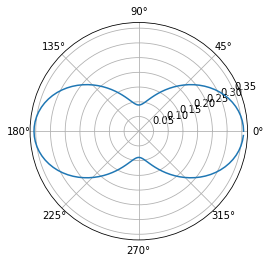

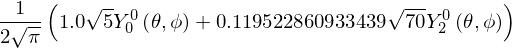

In [173]:
# Examples matching pmm cases for 1-photon transitions given above

# Define states
Ji = 1  # Initial |J>
Jf = 2  # Final |J>
p = (1,0)   # Coupling (photon) |1,q>

print('Linear polarization Jf=Ji+1 - aligned final state ensemble')
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
Atp = sphSumTKQ(TKQ, 2, norm = TKQ[0][2])
print(TKQ)
Ytp = sphNList(Atp,tList)
plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)))  # Manual fix to symmetry for theta = 0:2pi
plt.show()
Atp

Linear polarization Jf=Ji - (anti) aligned final state ensemble
[[0.         0.         0.1490712 ]
 [2.         0.         0.12472191]]


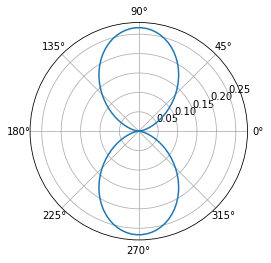

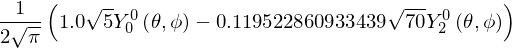

In [174]:
# For dJ=0
print('Linear polarization Jf=Ji - (anti) aligned final state ensemble')
TKQ = TKQpmm(Jf,Jf, Ji = Jf, p = p)
Atp = sphSumTKQ(TKQ, 2, norm = TKQ[0][2])
print(TKQ)
Ytp = sphNList(Atp,tList)
plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)))  # Manual fix to symmetry for theta = 0:2pi
plt.show()
Atp

Circ polarization, q=+1 - oriented final state ensemble
[[ 0.          0.          0.1490712 ]
 [ 1.          0.         -0.15811388]
 [ 2.          0.          0.06236096]]


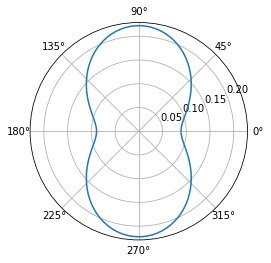

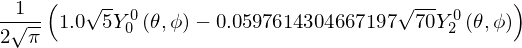

In [175]:
# Case for circular polarization
p = (1,1)   # Coupling (photon) |1,q>

print('Circ polarization, q=+1 - oriented final state ensemble')
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
Atp = sphSumTKQ(TKQ, 2, norm = TKQ[0][2])
print(TKQ)
Ytp = sphNList(Atp,tList)
plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)))  # Manual fix to symmetry for theta = 0:2pi
plt.show()
Atp

Of note here is the, perhaps surprising, result that only even-$K$
terms are allowed, hence there is no orientation apparent in the spatial
distribution $W(\theta,\phi)$ for the single $J$-state case illustrated. In this case, the $3j$ symbol (Eqn. 4.101 in Blum, as given above)  indicates
that terms with $J'=J$ can only result in even-$K$. However, terms with odd valued $J'-J$ can contribute to odd-$K$ terms.
This can be physically rationalised by noting that the difference between $+M$
and $-M$ terms is purely in terms of the phase of the wavefunction,
hence it will not contribute to a real-space observable unless suitable
interferences are present. 

# Frame rotations #

For the state multipoles, frame rotations are fairly straightforward
(Eqn. 4.41 in Blum):

\begin{equation}
\left\langle T(J',J)_{KQ}^{\dagger}\right\rangle =\sum_{q}\left\langle T(J',J)_{Kq}^{\dagger}\right\rangle D(\Omega)_{qQ}^{K*}
\end{equation}

Where $D(\Omega)_{qQ}^{K*}$ is a Wigner rotation operator, for a
rotation defined by a set of Euler angles $\Omega=\{\theta,\phi,\chi\}$.
Hence the multipoles transform, as expected, as irreducible tensors,
i.e. components $q$ are mixed by rotation, but terms of different
rank $K$ are not. 

In [176]:
# Define frame rotation of state multipoles.
# Eqn. 4.41 in Blum (p127)
# Currently a bit ugly!
# Also set for numerical output only, although uses Sympy functions which can be used symbolically.

from sympy.physics.quantum.spin import Rotation

# Pass TKQ np.array [T,Q,TKQ], eAngs list of Euler angles (theta,phi,chi) to define rotation.
def TKQarrayRot(TKQ,eAngs):
    TKQRot = []
    thres = 1E-5
    Kmax = 6
    
    # Easy way - loop over possible output values & sum based on input TKQ. Can probably do this in a smarter way.
    for K in range(0,Kmax+1):
        for q in range(-K,K+1):
            
            # Set summation variable and add relevant terms from summation
            TKQRotSum = 0.0
            for row in range(TKQ.shape[0]):
                Kin = TKQ[row][0]
                Qin = TKQ[row][1]
                
                if Kin == K:
                    Dval = Rotation.D(K,Qin,q,eAngs[0],eAngs[1],eAngs[2])
                    TKQRotSum += conjugate(Dval.doit())*TKQ[row][2] 
                else:
                    pass
            
            if np.abs(N(TKQRotSum)) > thres:    
                TKQRot.append([K,q,N(TKQRotSum)])  # Use N() here to ensure Sympy numerical output only
    
    return np.array(TKQRot)
                

## Example: rotated real-space distributions ##

In [177]:
# Define a distribution and rotated form
TKQ = np.array([[0,0,1],[2,0,0.5]])  # Set alignment terms, list [K,Q,TKQ]

# Euler angles
eAngs = [0,pi/4,0]  # 45deg. rotation
TKQrot = TKQarrayRot(TKQ,eAngs)
print(eAngs)
print(TKQrot)

eAngs = [0,pi/2,0]  # 90deg. rotation
TKQrot = TKQarrayRot(TKQ,eAngs)
print(eAngs)
print(TKQrot)

[0, pi/4, 0]
[[0 0 1.00000000000000]
 [2 -2 0.153093108923949]
 [2 -1 -0.306186217847897]
 [2 0 0.125000000000000]
 [2 1 0.306186217847897]
 [2 2 0.153093108923949]]
[0, pi/2, 0]
[[0 0 1.00000000000000]
 [2 -2 0.306186217847897]
 [2 0 -0.250000000000000]
 [2 2 0.306186217847897]]


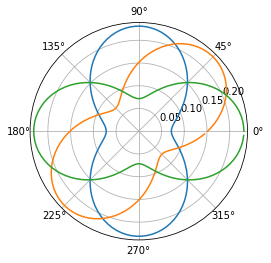

In [178]:
# Calculate real-space representations
Atp = sphSumTKQ(TKQ, 2, norm = TKQ[0][2])
Ytp = sphNList(Atp,tList)

# 45 deg. rotation
eAngs = [0,pi/4,0]  
TKQrot = TKQarrayRot(TKQ,eAngs)
AtpRot = sphSumTKQ(TKQrot, 2, norm = TKQrot[0][2])
YtpRot = sphNList(AtpRot,tList)

# 90 deg. rotation
eAngs = [0,pi/2,0]  
TKQrot90 = TKQarrayRot(TKQ,eAngs)
AtpRot90 = sphSumTKQ(TKQrot90, 2, norm = TKQrot90[0][2])
YtpRot90 = sphNList(AtpRot90,tList)

# Plot
plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)))  # Manual fix to symmetry for theta = 0:2pi
plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((YtpRot, YtpRot)))
plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((YtpRot90, YtpRot90)))
plt.show()

Of note in these cases are the invariance of the form of the distribution to rotation, although the state multipoles describing the distribution in the original reference frame *do* change upon rotation.

## Example: density matrices for rotated frames ##
The density matrices in a rotated frame can also be readily determined as previously (Eqn. 4.34 in Blum).

Original ensemble
[[ 0.   0.   1. ]
 [ 2.   0.  -0.5]]


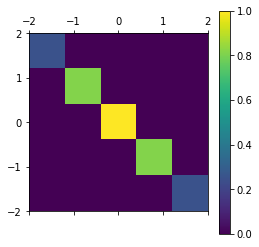

Rotated ensemble, 45 deg.
[[0 0 1.00000000000000]
 [2 -2 -0.153093108923949]
 [2 -1 0.306186217847897]
 [2 0 -0.125000000000000]
 [2 1 -0.306186217847897]
 [2 2 -0.153093108923949]]


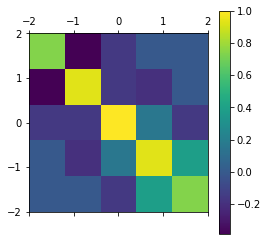

Rotated ensemble, 90 deg.
[[0 0 1.00000000000000]
 [2 -2 -0.306186217847897]
 [2 0 0.250000000000000]
 [2 2 -0.306186217847897]]


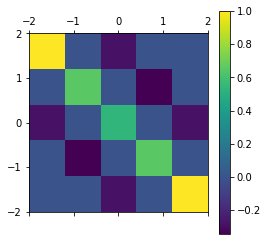

In [179]:
# Set ensemble
TKQ = np.array([[0,0,1],[2,0,-0.5]])  # Set alignment terms, list [K,Q,TKQ]

Jp = 2  # Set angular momenta - assume a singe J-state, hence Jp=J
J = Jp

# Unrotated case
pmm = pJpNpJN(Jp,J,TKQ)  # Determine pmm

print('Original ensemble')
print(TKQ)
plt.matshow(pmm/np.amax(pmm), extent = (-Jp,Jp,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()

# Rotated ensemble
eAngs = [0,pi/4,0]  # 45deg. rotation
TKQrot = TKQarrayRot(TKQ,eAngs)

pmmRot = pJpNpJN(Jp,J,TKQrot)  # Determine pmm

print('Rotated ensemble, 45 deg.')
print(TKQrot)
plt.matshow(pmmRot/np.amax(pmmRot), extent = (-Jp,Jp,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()

# Rotated ensemble
eAngs = [0,pi/2,0]  # 90deg. rotation
TKQrot = TKQarrayRot(TKQ,eAngs)

pmmRot = pJpNpJN(Jp,J,TKQrot)  # Determine pmm

print('Rotated ensemble, 90 deg.')
print(TKQrot)
plt.matshow(pmmRot/np.amax(pmmRot), extent = (-Jp,Jp,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()

Note that, in the rotated case, *coherences* - off-diagonal elements - are now present. Physically, this can be considered as the projection of the new (rotated frame) quantization axis onto the original frame, which defines the basis space. For further discussion, see refs. [1 - 4].